ROUGH DRAFT

In [33]:
#Import packages and set pylab inline to plots show up in the notebook
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from statsmodels.formula.api import ols, glsar
import statsmodels.formula.api as sm
from matplotlib.font_manager import FontProperties

Populating the interactive namespace from numpy and matplotlib


In [118]:
#take a linear regression by state
st_gen = pd.read_csv('by_st_gen.csv')


st_gen.head()

,year,AK,AL,AR,AZ,CA,CO,CT,DC,DE,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,1960,867458.0,11081902.0,6054442.0,4185564.0,50139109.0,5966581.0,6939534.0,1492433.0,2327572.0,...,1864103.0,11702072.0,66361104.0,3995130.0,11265835.0,924997.0,10687759.0,10976657.0,7808858.0,2109696.0
1,1961,1009859.0,10829504.0,6163641.0,4512767.0,52436995.0,6468158.0,7072532.0,1455224.0,2243549.0,...,1897560.0,11950623.0,67039784.0,3995891.0,11294725.0,974444.0,11072561.0,11276274.0,8287667.0,2305582.0
2,1962,1099188.0,11494177.0,6538512.0,4782933.0,54108178.0,6553966.0,7335331.0,1485847.0,2423397.0,...,1981844.0,12443316.0,70190893.0,4162082.0,11724328.0,1006309.0,11595241.0,11861066.0,8372378.0,2551349.0
3,1963,1137772.0,11921317.0,6923084.0,5056721.0,56797786.0,6542968.0,7437937.0,1497520.0,2574576.0,...,2073308.0,12957817.0,74631940.0,4196297.0,12431887.0,999337.0,12151647.0,12197917.0,8649972.0,2445622.0
4,1964,1197268.0,12705540.0,7502141.0,5278376.0,61115445.0,7017378.0,7674193.0,1652318.0,2577356.0,...,2116378.0,13229839.0,76655707.0,4485706.0,12806567.0,955426.0,12946754.0,12635350.0,9093551.0,2455285.0


In [140]:
USGEN = st_gen.set_index('year')
col_list= list(USGEN)
USGEN = USGEN['American_Consumption'] = USGEN[col_list].sum(axis=1)
USGEN.reset_index()

RuntimeError: maximum recursion depth exceeded in __instancecheck__

RuntimeError: maximum recursion depth exceeded

In [141]:
#Focus on 6 biggest states, also benificial that they have different political affiliations
ca = st_gen[['year','CA']]
tx = st_gen[['year','TX']]
pa = st_gen[['year','PA']]
wa = st_gen[['year','WA']]
ny = st_gen[['year','NY']]
fl = st_gen[['year','FL']]

In [142]:
#fitting a regression to California. I chose the degree based on how well it fit the
#local maxima and minima of the graph
p, res, _, _, _ = np.polyfit(x = ca.year, y= ca.CA, deg=20, full = True)

In [143]:
yfitca = np.polyval(p,ca.year)


AttributeError: 'Series' object has no attribute 'year'

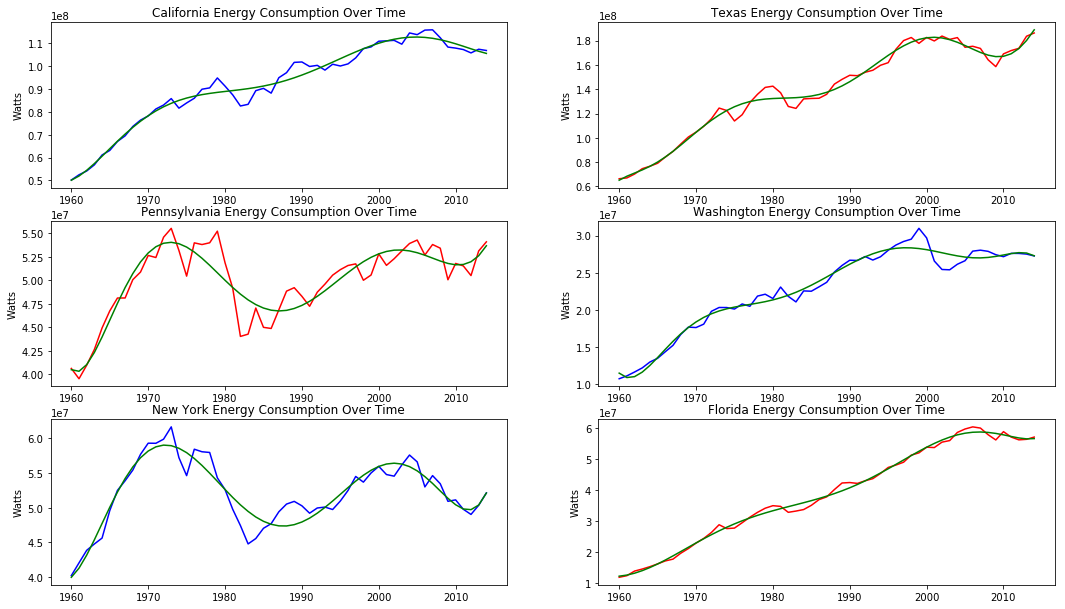

In [144]:
fig = plt.figure(figsize=(18, 14))

#Plotting our fit on top of our data for California
plt.subplot(4,2,1)
plt.plot(ca.year,ca.CA, label='data', c = 'b')
plt.plot(ca.year,yfitca, label='fit', c = 'g')
plt.title('California Energy Consumption Over Time')
plt.ylabel('Watts')

#Doing it for the other powerhouse state, TEXAS
p, res, _, _, _ = np.polyfit(x = tx.year, y= tx.TX, deg=40, full = True)
yfittx = np.polyval(p,ca.year)
plt.subplot(4,2,2)
plt.plot(tx.year,tx.TX, label='data', c = 'r')
plt.plot(tx.year,yfittx, label='fit', c = 'g')
plt.title('Texas Energy Consumption Over Time')
plt.ylabel('Watts')

#Pennsylvania has been a historically densely populated, industrial state, so I wanted to take a look
p, res, _, _, _ = np.polyfit(x = pa.year, y= pa.PA, deg=22, full = True)
yfitpa = np.polyval(p,pa.year)
plt.subplot(4,2,3)
plt.plot(pa.year,pa.PA, label='data', c = 'r')
plt.plot(pa.year,yfitpa, label='fit', c = 'g')
plt.title('Pennsylvania Energy Consumption Over Time')
plt.ylabel('Watts')

#Washington has access to a lot of hydro power, and a very diverse political climate
p, res, _, _, _ = np.polyfit(x = wa.year, y= wa.WA, deg=20, full = True)
yfitwa = np.polyval(p,wa.year)
plt.subplot(4,2,4)
plt.plot(wa.year,wa.WA, label='data', c = 'b')
plt.plot(wa.year,yfitwa, label='fit', c = 'g')
plt.title('Washington Energy Consumption Over Time')
plt.ylabel('Watts')

#Can't leave out the big apple. Uptick at the end is very intersting, but I think on a less myopic scale,
#we'd likely see a trend downward.
p, res, _, _, _ = np.polyfit(x = ny.year, y= ny.NY, deg=8, full = True)
yfitny = np.polyval(p,ny.year)
plt.subplot(4,2,5)
plt.plot(ny.year,ny.NY, label='data', c ='b')
plt.plot(ny.year,yfitny, label='fit', c = 'g')
plt.title('New York Energy Consumption Over Time')
plt.ylabel('Watts')

#And of course Florida. Pretty politically moderate state, with a large population.
p, res, _, _, _ = np.polyfit(x = fl.year, y= fl.FL, deg=25, full = True)
yfitfl = np.polyval(p,fl.year)
plt.subplot(4,2,6)
plt.plot(fl.year,fl.FL, label='data', c = 'r')
plt.plot(fl.year,yfitfl, label='fit', c = 'g')
plt.title('Florida Energy Consumption Over Time')
plt.ylabel('Watts')

#Now for the entire country
p, res, _, _, _ = np.polyfit(x = USGEN.year, y= USGEN.American_Consumption, deg=25, full = True)
yfitfl = np.polyval(p,USGEN.year)
plt.subplot(4,2,7)
plt.plot(USGEN.year,USGEN.American_Consumption, label='data', c = 'r', linestyle = '-')
plt.plot(USGEN.year,USGEN.American_Consumption, label='data', c = 'b', linestyle = '--')
plt.plot(USGEN.year,yfitfl, label='fit')
plt.title('American Energy Consumption Over Time')
plt.ylabel('Watts')

It looks like Texas is still very much in a growth phase of energy consumption. When comapred to California, we see that maybe some of California's more liberal constituents are having their desired effect on energy policy. What will be interesting, however, is if Texas is using more orless renewables every year, and if their growth is at least "clean".

Plotted 3 more states across the political gamut. A slightly conservative state like Florida is trending down in energy consumption while NY is trending up, regardless of its more lberal voter base. Now I'll dive into the mixes to see if these trends are at least in the right direction.

#was going to use this, but polyfit was more easily interpretable. 
#I do like how you can use GLS and ARCH with statsmodels,
#but polyfit in numpy was more than enough for what I needed.


m = sm.OLS(ca.CA,ca.year**3)
mres = m.fit()
print mres.summary()
ypred = mres.predict(ca.year)
print(ypred)

plt.scatter(mres.fittedvalues, ca.CA)
plt.scatter(ca.year,mres.resid)


In [145]:
#The more I look at this, the more useless I think this will be. It doesn't really answer any big questions, and
#its actually pretty obscure information. 
cons = pd.read_csv('type_gen.csv')

cons.columns = ['year','Commercial Power', 'Electric Power','Industrial Power','Electric Utilities','Independents','Total']
cons.head()

,year,Commercial Power,Electric Power,Industrial Power,Electric Utilities,Independents,Total
0,1990,23348486.0,245101798.0,522674386.0,1.123260e+10,127580642.0,1.215131e+10
1,1991,22636104.0,287767024.0,530316764.0,1.130009e+10,154384202.0,1.229520e+10
2,1992,24912544.0,365275648.0,573121884.0,1.118888e+10,183342160.0,1.233553e+10
3,1993,28001676.0,431905600.0,585175490.0,1.153010e+10,213582554.0,1.278876e+10
4,1994,30477314.0,493998632.0,604710938.0,1.164285e+10,218054370.0,1.299009e+10


Probably a little unorthodox, but I think it could be valuable to try and group the years together to see if there was some sort of shift in who is using power over time. Using KNN, see if we actually get any distinct neighborhoods. This could help us detemine if we really have made a change in who is using energy, and how much they're using.

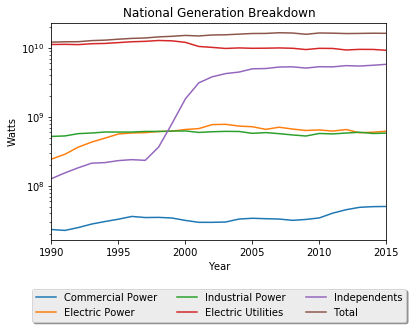

In [146]:
cons.plot(x = 'year', logy = True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -.2),
          ncol=3, fancybox=True, shadow=True)
plt.title('National Generation Breakdown')
plt.ylabel('Watts')
plt.xlabel('Year')
#ignore the legend for now, but I don't really think this graph tells us all that much,
#except that generation is slowing down.

In [147]:
inp = pd.read_csv('input_type.csv')
st_type = pd.read_csv('st_gen_max.csv')
st_type.head()
affil = pd.read_csv('party_aff.csv')

In [148]:
st_type = st_type.drop('Unnamed: 0', axis = 1)
st_type = st_type[st_type.gen_by_type != 0]
st_type = st_type[st_type.state != 'US-TOTAL']
st_type = st_type[st_type.state != 'US-Total']



In [149]:
#Replacing our categorical with a numeric value to facilitate modelling
affil["swing"] = np.where(affil["affiliation"].str.contains("Rep"), 1, 0)

In [150]:
#Merge in our affiliation with our state maximum generation type
st_type = st_type.merge(affil, on='state', how = 'inner')

In [151]:
#dropping the affiliation column that still has our string based categorical variable
st_type = st_type.drop('affiliation',1)

In [75]:
#first we'll see if there is any predictive power in modelling a state's maximum generation type
#on the quantity of that generation. Maybe states who need more power use more fossil fuels?
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
param_grid = {'n_neighbors': [2,3,4,5]}

knn = KNeighborsClassifier()

X = st_type[['gen_by_type','swing']]
#X = st_type.gen_by_type.values.reshape(-1,1)


x_train, x_test, y_train, y_test = train_test_split(X, st_type.input_type, test_size = .3)
knn_cv = GridSearchCV(knn, param_grid, cv = 5)
knn_cv.fit(x_train, y_train)

print("Tuned Knn classifier paramters: {}".format(knn_cv.best_params_))
print("Tuned Knn classifier score: {}".format(knn_cv.best_score_))





Tuned Knn classifier paramters: {'n_neighbors': 5}
Tuned Knn classifier score: 0.657142857143


/Users/jackdwyer/anaconda/lib/python2.7/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


What this tells us is that not only are there 3-5 big generation types in the country, but they are likely related to size of generation needed for states. Thinking critically, and using other information, we know that a large state like California does not rely on coal, while other smaller states may. This is for two reasons: Natural gas has become very cheap, especially with the shale revolution, and natural gas is very energy dense and carbon deficient. I think the states that rely on hydro are actually muddying up our analysis, because they are endowed with a unqiue resource that makes classification hard.

Additionally, I ran this analysis without the political affilaition, and found very similar results. 

In [106]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
accuracy_score(y_test,prediction)

0.73333333333333328

An accuracy of ~.5 isn't incredibly bad given how little data we fed our model, and the political and geographic nature of the various states. 

I'll run a difference and see if there is a significant difference between the scores with and without the political party included.

In [77]:
#Running two KNN classifiers to determine if there indluding political affiliation significantly
#impacts our regression results on whether or not a state utilizes coal more heavily.



X_affil = st_type[['gen_by_type','swing']]
X_none = st_type.gen_by_type.values.reshape(-1,1)
score_affil = []
score_none = []

for i in range(1000):
    knn = KNeighborsClassifier(n_neighbors=4)
    x_train, x_test, y_train, y_test = train_test_split(X_affil, st_type.input_type, test_size = .3)
    knn.fit(x_train, y_train)
    prediction = knn.predict(x_test)
    score_affil.append(accuracy_score(y_test,prediction))

    x_train, x_test, y_train, y_test = train_test_split(X_none, st_type.input_type, test_size = .3)
    knn = KNeighborsClassifier(n_neighbors=4)
    knn.fit(x_train, y_train)
    prediction = knn.predict(x_test)
    score_none.append(accuracy_score(y_test,prediction))

    


In [78]:
#Taking difference of means, then permuting the scores and taking a new difference and seeing how often
#the new difference exceeds the original difference of means. 
diff_of_means = np.mean(score_none)-np.mean(score_affil)
array = score_none+score_affil
rand_scores = np.random.permutation(array)
new_diff = rand_scores[0:1000] - rand_scores[1000:]

In [79]:
#Having more than 50 P's will tell us that the classification is likely just as good with or without
#including political affiliation.
p = np.sum((new_diff>=diff_of_means))
print p


436


Since more than 50 of our 1000 samples fail to reject the null that the means of the score are different, I would say the party affiliation of each state has no real impact on what their main generation is.

Another thing we can do here is figure out if using input and political party, we can predict the main generation input in a state. I suspect that it will be mostly fruitless, as above we saw little to no impact, but it'll be worth a shot. Because Coal is the commodity on everyone's mind, I'll make that the outcome (whether or not a state relies most on coal).

In [80]:
st_type["coal"] = np.where(st_type["input_type"].str.contains("Coal"), 1, 0)

In [81]:
st_type.head()
coal_df = st_type.drop('input_type',1)

In [82]:
#Grid Search Cross Validation to find best parameters for our model
#We're using amount of generation and political affiliation as our exogenous variables.
#Hoping to see if being of a certain poliitcal lean, and having a certain level of generation will be useful in
#predicting whtether or not coal is the most heavily utilized.
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
param_grid = {'C': np.logspace(-5,8,15), 'penalty': ['l1','l2']}

knn = LogisticRegression()

X = coal_df[['gen_by_type','swing']]


x_train, x_test, y_train, y_test = train_test_split(X, st_type.coal, test_size = .3)
knn_cv = GridSearchCV(knn, param_grid, cv = 5)
knn_cv.fit(x_train, y_train)

print("Tuned Log classifier paramters: {}".format(knn_cv.best_params_))
print("Tuned Log classifier score: {}".format(knn_cv.best_score_))

Tuned Log classifier paramters: {'penalty': 'l1', 'C': 3.7275937203149381}
Tuned Log classifier score: 0.714285714286


In [83]:
knn = LogisticRegression(C = 3.73, penalty='l1')
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
accuracy_score(y_test,prediction)

0.59999999999999998

Sort of surprising result, and sesnsible one too. It is at least kind of predictable whether or not a state will use coal based on it's generation and affiliation. Below I'll see how well simply being mostly conservative predicts coals use. I assume it'll be very close to the result we just obtained.

In [84]:
#Doing a grid search cross validation to figure out best way to do KNN.
#Here we are just seeing if political affiliation can predict, even decently, whether
#or not coal will be utilized.
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
param_grid = {'C': np.logspace(-5,8,15), 'penalty': ['l1','l2']}

knn = LogisticRegression()

X = coal_df['swing'].values.reshape(-1,1)


x_train, x_test, y_train, y_test = train_test_split(X, st_type.coal, test_size = .3)
knn_cv = GridSearchCV(knn, param_grid, cv = 5)
knn_cv.fit(x_train, y_train)

print("Tuned Log classifier paramters: {}".format(knn_cv.best_params_))
print("Tuned Log classifier score: {}".format(knn_cv.best_score_))

Tuned Log classifier paramters: {'penalty': 'l1', 'C': 0.43939705607607948}
Tuned Log classifier score: 0.714285714286


In [92]:
#Plugging in the best parameter from above
knn = LogisticRegression(C = .4394, penalty='l1')
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
accuracy_score(y_test,prediction)

0.73333333333333328

As expected, pretty similar. I think this has more to do with smaller conservative states using coal more rather than liberal states using coal less. Still a cool comparison.

Now that we've got an idea for what's happening from state to state, I want to see what Coal's regression looks like.

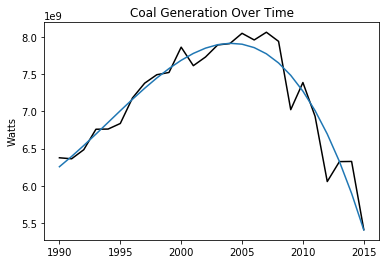

In [111]:
#Plotting Coal
p,res,_,_,_ = np.polyfit(inp.year, inp.Coal, deg = 3, full=True)
yfitcoal = np.polyval(p,inp.year)
figure()
plot(inp.year, inp.Coal, label = 'data', c = 'black')
plot(inp.year, yfitcoal, label = 'fit')
plt.title('Coal Generation Over Time')
plt.ylabel('Watts')


Without really needing to do any analysis, it looks like coal is declining, and has been for some time. Drawing on my energy economics background, I can tell you that while we're just now hearing about the death of coal and policies around killing coal, it's actually been on it's way our for the last 10-15 years (pre-obamam even). Coal stopped being economically viable when natural gas hydraulic fracturing and shale became pervasive, and while those have a hose of their own problems, we can at least have clean(er) air to accompany our "dirty water".

Not surpisingly, natural gas has been climbing at an increasing rate for as long as our data can show.

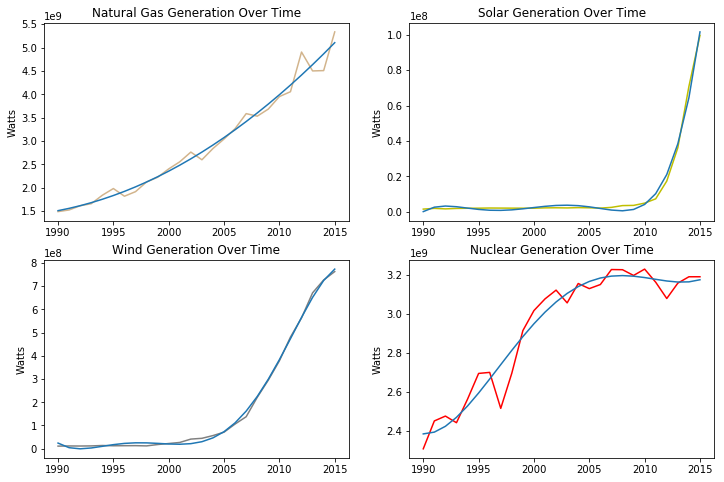

In [113]:
fig = plt.figure(figsize=(12, 8)) 

#Plotting Natural Gas
p,res,_,_,_ = np.polyfit(inp.year, inp['Natural Gas'], deg = 2, full=True)
yfitcoal = np.polyval(p,inp.year)
plt.subplot(2,2,1)
plt.plot(inp.year, inp['Natural Gas'], label = 'data', c = 'tan')
plt.plot(inp.year, yfitcoal, label = 'fit')
plt.title('Natural Gas Generation Over Time')
plt.ylabel('Watts')


#Plottinh Solar
p,res,_,_,_ = np.polyfit(inp.year, inp['Solar Thermal and Photovoltaic'], deg = 5, full=True)
yfitcoal = np.polyval(p,inp.year)
plt.subplot(2,2,2)
plt.plot(inp.year, inp['Solar Thermal and Photovoltaic'], label = 'data',c = 'y')
plt.plot(inp.year, yfitcoal, label = 'fit')
plt.title('Solar Generation Over Time')
plt.ylabel('Watts')


#Plotting Wind
p,res,_,_,_ = np.polyfit(inp.year, inp['Wind'], deg = 5, full=True)
yfitcoal = np.polyval(p,inp.year)
plt.subplot(2,2,3)
plt.plot(inp.year, inp['Wind'], label = 'data', c = 'gray')
plt.plot(inp.year, yfitcoal, label = 'fit')
plt.title('Wind Generation Over Time')
plt.ylabel('Watts')


#Plotting Nuclear
p,res,_,_,_ = np.polyfit(inp.year, inp['Nuclear'], deg = 4, full=True)
yfitcoal = np.polyval(p,inp.year)
plt.subplot(2,2,4)
plt.plot(inp.year, inp['Nuclear'], label = 'data', c = 'r')
plt.plot(inp.year, yfitcoal, label = 'fit')
plt.title('Nuclear Generation Over Time')
plt.ylabel('Watts')
